<p><center style="font-family:cursive; color:green;font-size:120%;">PlantVillage Dataset</center></p>

# <p><center style="font-family:newtimeroman;font-size:180%;">Classifier PlantVillage 🌿 (Multiclass)</center></p>

<p><center style="color:green; font-family:cursive;font-size:100%;">Modified for PlantVillage Dataset</center></p>

***

<p style="text-align:center;"><span style="font-size:48px;"><span style="color:#90EE90;"><span style="font-family:cursive;"> Hello everyone! </span> </span>  </span></p>

<div style="color:#000;
           display:fill;
           border-radius:100px;
           background-color:#90EE90;
           font-size:120%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 50px;
              color:black;">📌 This notebook has been modified to perform multiclass classification on the PlantVillage dataset.

</p>
</div>

<hr>

<div style="background-color: #87CEFA; padding: 20px; margin: 10px; border-radius: 10px; box-shadow: 5px 5px 5px #888888;">
  <h1 style="color: #000; font-size: 20px;">Table of Contents</h1>
  <ul style="list-style-type: disc; padding-left: 0; font-size: 16px;">
    <li style="margin-left: 15px;"><a href="#section-1" style="color: #000; text-decoration: none;">1. Overview</a></li>
    <li style="margin-left: 15px;"><a href="#section-2" style="color: #000; text-decoration: none;">2. Import Libraries</a></li>
    <li style="margin-left: 15px;"><a href="#section-3" style="color: #000; text-decoration: none;">3. Preprocessing</a>
        <br> 
      <ul style="list-style-type: circle; padding-left: 15px; font-size: 14px;">
        <li>3.1 Get the pathes</li>
        <li>3.2 Load the Images with a generator and Data Augmentation</li>
        <li>3.3 Display images</li>
        <li>3.4 EarlyStopping</li>
        <li>3.5 Reduction learning_rate</li>
      </ul>
    </li>
      <li style="margin-left: 15px;"><a href="#section-1" style="color: #000; text-decoration: none;">4. Exponential Decay</a></li>
      <li style="margin-left: 15px;"><a href="#section-4" style="color: #000; text-decoration: none;">5. Compare between TL Models</a>
      <ul style="list-style-type: circle; padding-left: 15px; font-size: 14px;">
        <li>5.1 Get subset from training data</li>
        <li>5.2 Training the Models and get Histories </li>
        <li>5.3 Analyze the performance of TL Models </li> 
      </ul>
    </li>
    <li style="margin-left: 15px;"><a href="#section-4" style="color: #000; text-decoration: none;">6. Transfer Learning</a>
      <ul style="list-style-type: circle; padding-left: 15px; font-size: 14px;">
        <li>6.1 Get the weights from Xception</li>
        <li>6.2 Freeze the layers of Xception</li>
      </ul>
    </li>
    <li style="margin-left: 15px;"><a href="#section-5" style="color: #000; text-decoration: none;">7. Build the Model</a>
      <ul style="list-style-type: circle; padding-left: 15px; font-size: 14px;">
        <li>7.1 Build the Model </li>
        <li>7.2 Set the optimizer</li>
        <li>7.3 Training the model </li>
      </ul>
    </li>
      <li style="margin-left: 15px;"><a href="#section-1" style="color: #000; text-decoration: none;">8. Evaluate the model</a>
      <ul style="list-style-type: circle; padding-left: 15px; font-size: 14px;">
        <li>8.1 Evaluate the validationr</li>
        <li>8.2 Accuracy graph</li>
        <li>8.3 Loss graph</li>
        <li>8.4 Confusion Matrix</li>
        <li>8.5 Generate predictions for the test data</li>    
      </ul>
      </li>
    <li style="margin-left: 15px;"><a href="#section-6" style="color: #000; text-decoration: none;">9. Conclusion</a></li>
  </ul>
</div>


<a id="section-1"></a>
<h1 style="background-color: #90EE90; color: #000; text-align: center; border: 2px solid #000; border-radius: 10px; padding: 10px; box-shadow: 5px 5px 5px rgba(0, 0, 0, 0.75); transform: rotateX(10deg);">
  Overview
</h1>

# 1️⃣. Overview

In this notebook we will make a **classifier** for the **PlantVillage** dataset (Multiclass) according to the following steps:

- We will pre-process the data using **ImageDataGenerator** and **flow_from_dataframe**.
- Then we will explain both ideas **Early_stopping** and **Reduction_learning_rate** and why we used them
- After that, we explained in detail the importance of the idea of **Exponential Decay** and how to implement it
* Compare between **TL Models** and choose the **best one** 
- Then we chose **Xception** to train the model on it 
- Finally, we built the neural network, trained it, and checked its accuracy

<a id="section-1"></a>
<h1 style="background-color: #87CEFA; color: #000; text-align: center; border: 2px solid #000; border-radius: 10px; padding: 10px; box-shadow: 5px 5px 5px rgba(0, 0, 0, 0.75); transform: rotateX(10deg);">
  Import Libraries
</h1>

# 2️⃣. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import glob as gb
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg
from tqdm import tqdm
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception

2025-12-12 05:08:38.877067: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765516119.269218      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765516119.400870      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
def split_data(data_dir):
    filepaths = []
    labels = []
    
    folds = os.listdir(data_dir)
    for fold in folds:
        foldpath = os.path.join(data_dir, fold)
        if os.path.isdir(foldpath):
            filelist = os.listdir(foldpath)
            for file in filelist:
                fpath = os.path.join(foldpath, file)
                filepaths.append(fpath)
                labels.append(fold)
    
    # Concatenate data paths with labels into one dataframe
    Fseries = pd.Series(filepaths, name= 'filepaths')
    Lseries = pd.Series(labels, name='labels')
    df = pd.concat([Fseries, Lseries], axis= 1)
    
    # Split the data
    train_df, dummy_df = train_test_split(df,  train_size= 0.8, shuffle= True, random_state= 123)
    valid_df, test_df = train_test_split(dummy_df,  train_size= 0.5, shuffle= True, random_state= 123)
    
    return train_df, valid_df, test_df

def create_gens(train_df, valid_df, test_df, batch_size):
    img_size = (224, 224)
    
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    test_datagen = ImageDataGenerator(rescale=1./255)
    
    train_gen = train_datagen.flow_from_dataframe(
        train_df, 
        x_col= 'filepaths', 
        y_col= 'labels', 
        target_size= img_size, 
        class_mode= 'categorical',
        color_mode= 'rgb', 
        shuffle= True, 
        batch_size= batch_size
    )
    
    valid_gen = test_datagen.flow_from_dataframe(
        valid_df, 
        x_col= 'filepaths', 
        y_col= 'labels', 
        target_size= img_size, 
        class_mode= 'categorical',
        color_mode= 'rgb', 
        shuffle= True, 
        batch_size= batch_size
    )
    
    test_gen = test_datagen.flow_from_dataframe(
        test_df, 
        x_col= 'filepaths', 
        y_col= 'labels', 
        target_size= img_size, 
        class_mode= 'categorical',
        color_mode= 'rgb', 
        shuffle= False, 
        batch_size= batch_size
    )
    
    return train_gen, valid_gen, test_gen

<a id="section-1"></a>
<h1 style="background-color: #87CEFA; color: #000; text-align: center; border: 2px solid #000; border-radius: 10px; padding: 10px; box-shadow: 5px 5px 5px rgba(0, 0, 0, 0.75); transform: rotateX(10deg);">
  Preprocessing
</h1>

# 3️⃣.Preprocessing

### 3.1 Get the pathes

In [3]:
data_dir = '/kaggle/input/plantvillage-dataset/color'

try:
    # Get splitted data
    train_df, valid_df, test_df = split_data(data_dir)

    # Get Generators
    batch_size = 40
    train_gen, valid_gen, test_gen = create_gens(train_df, valid_df, test_df, batch_size)
    
    # Map to variables used in the rest of the notebook
    train_generator = train_gen
    val_generator = valid_gen
    test_generator = test_gen
    
    print("Data loaded successfully!")

except Exception as e:
    print(f'Invalid Input: {e}')

Found 43444 validated image filenames belonging to 38 classes.
Found 5430 validated image filenames belonging to 38 classes.
Found 5431 validated image filenames belonging to 38 classes.
Data loaded successfully!


### 3.2 Load the Images with a generator and Data Augmentation


 ### Why you should use (flow_from_directory) for Visualize Images ?


 Using `flow_from_directory` in conjunction with `ImageDataGenerator` offers several advantages when working with image datasets in deep learning tasks. Here are some reasons why you might want to use `flow_from_directory`:

1. **Directory Structure and Labels**: If your data is organized in a directory structure where each subdirectory corresponds to a class, `flow_from_directory` can automatically assign labels to images based on the directory names. This eliminates the need for you to manually assign labels to each image.

2. **Data Augmentation**: `ImageDataGenerator` allows you to apply data augmentation techniques such as rotation, flipping, and scaling to your images on-the-fly while they are being loaded. This helps improve the generalization of your model and prevents overfitting.

3. **Batch Loading**: Loading images in batches helps manage memory efficiently, **especially when working with large datasets that may not fit into memory**. `flow_from_directory`loads images in batches, allowing you to train your model with minimal memory usage.

4. **Preprocessing**: `ImageDataGenerator` can apply preprocessing steps such as rescaling pixel values and standardizing input data on-the-fly. This ensures that your input data is properly preprocessed before being fed into the model.

5. **Easy Integration with Keras Models**: The data generator returned by `flow_from_directory` can be directly used as input for Keras' `fit` and `evaluate` methods. This streamlines the training and evaluation process, making it easier to manage data loading and preprocessing.

6. **Shuffling**: By setting the `shuffle` parameter to `True` in `flow_from_directory`, you can shuffle the order of images within each epoch, preventing the model from memorizing the order of training examples.

7. **Efficient Coding**: Using `flow_from_directory` reduces the amount of manual coding required to load and preprocess images, freeing you to focus more on building and training your models.

In [4]:
images_size = 224
batch_size = 40 # Updated to match the user's snippet

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, 'Orange___Haunglongbing_(Citrus_greening)'),
  Text(1, 0, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'),
  Text(2, 0, 'Soybean___healthy'),
  Text(3, 0, 'Peach___Bacterial_spot'),
  Text(4, 0, 'Tomato___Bacterial_spot'),
  Text(5, 0, 'Tomato___Late_blight'),
  Text(6, 0, 'Squash___Powdery_mildew'),
  Text(7, 0, 'Tomato___Septoria_leaf_spot'),
  Text(8, 0, 'Tomato___Spider_mites Two-spotted_spider_mite'),
  Text(9, 0, 'Apple___healthy'),
  Text(10, 0, 'Tomato___healthy'),
  Text(11, 0, 'Blueberry___healthy'),
  Text(12, 0, 'Pepper,_bell___healthy'),
  Text(13, 0, 'Tomato___Target_Spot'),
  Text(14, 0, 'Grape___Esca_(Black_Measles)'),
  Text(15, 0, 'Corn_(maize)___Common_rust_'),
  Text(16, 0, 'Corn_(maize)___healthy'),
  Text(17, 0, 'Grape___Black_rot'),
  Text(1

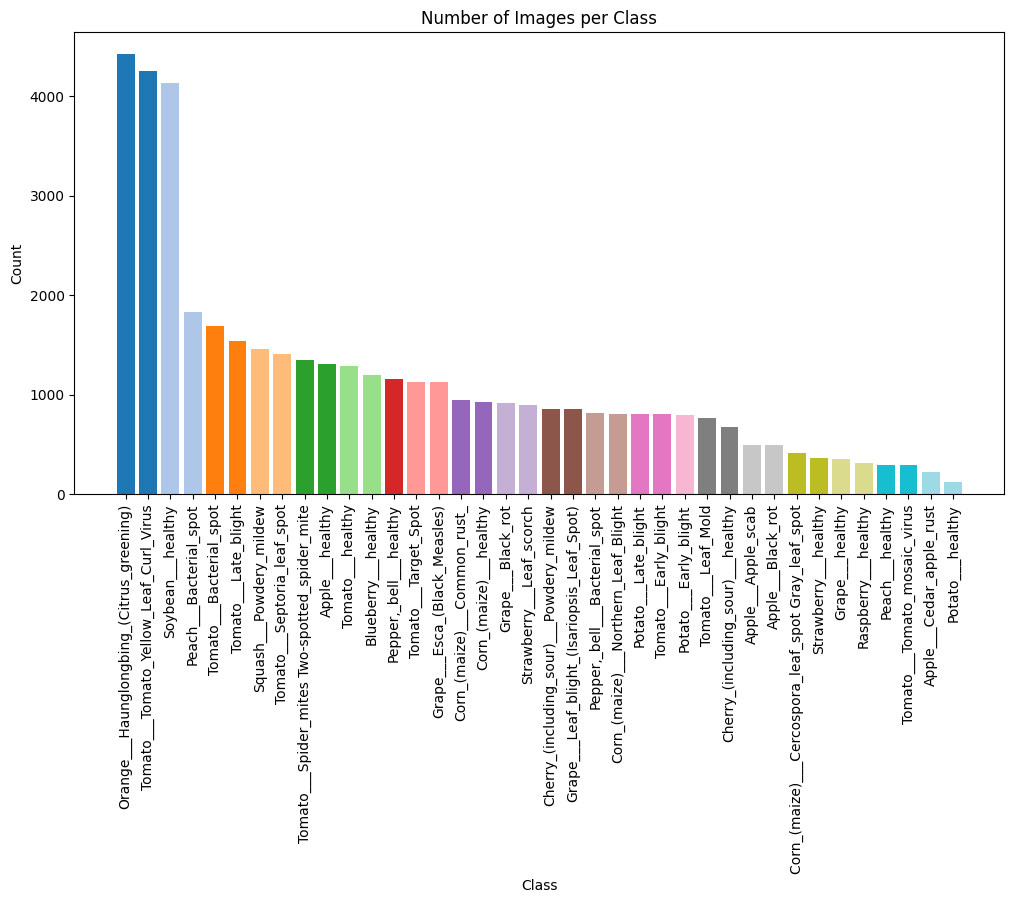

In [5]:
# Get the class labels
class_labels = list(train_generator.class_indices.keys())

# Calculate the count of images per class using the dataframe
class_counts = train_df['labels'].value_counts().to_dict()

# Define unique colors for each class
class_colors = plt.cm.tab20(np.linspace(0, 1, len(class_labels)))

# Create a bar chart with different colors for each class
plt.figure(figsize=(12, 6)) # Increased width for more classes
bars = plt.bar(class_counts.keys(), class_counts.values(), color=class_colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Images per Class')
plt.xticks(rotation=90) # Rotate 90 degrees for many classes

# Add a legend for class colors (optional, might be too crowded with 38 classes)
# legend_labels = [plt.Line2D([0], [0], color=class_colors[i], lw=4, label=class_labels[i]) for i in range(len(class_labels))]
# plt.legend(handles=legend_labels, title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.tight_layout()
# plt.show()

### 3.3 Display Images

In [6]:
def Show_Images(target_gen):
    # Get a batch of images and labels
    batch_images, batch_labels = next(target_gen)

    # Get class labels
    class_labels = list(target_gen.class_indices.keys())

    # Display images with labels
    plt.figure(figsize=(20, 20))
    for n , i in enumerate(list(np.random.randint(0,len(batch_images),16))):
        plt.subplot(4, 4, n + 1)
        plt.imshow(batch_images[i])
        plt.title(class_labels[np.argmax(batch_labels[i])])  # Display the class label
        plt.axis('off')
    plt.show()

In [7]:
#Show_Images(train_generator)

In [8]:
#Show_Images(test_generator)

### 3.4 EarlyStopping
***Early stopping*** works by monitoring the performance of the model on a validation set during training. The validation set is a set of data that is held out from the training data and is not used to train the model. The model's performance on the validation set is **used to determine if the model is overfitting.**

If the model's performance on the validation set starts to plateau or decrease, then the training is stopped early. **This prevents the model from continuing to fit the training data too closely**, which can lead to overfitting.

💡 Here is a simple analogy to help you understand early stopping:

Imagine you are trying to learn how to play a new game. You start by playing the game against a computer opponent. As you play, you get better and better at the game. However, at some point, you start to plateau. You are not getting any better at the game, even though you are still playing against the same computer opponent.




In [9]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)

### 3.5 Reduction learning_rate

Reduction of the learning rate means decreasing the step size (learning rate) during training to help a machine learning model converge more effectively and avoid convergence issues.

In [10]:
# Configure the learning rate reduction callback
learning_rate_reduce = ReduceLROnPlateau(
    monitor='val_accuracy',   # Metric to monitor for changes (usually validation accuracy)
    patience=5,          # Number of epochs with no improvement after which learning rate will be reduced
    verbose=1,           # Verbosity mode (0: silent, 1: update messages)
    factor=0.5,          # Factor by which the learning rate will be reduced (e.g., 0.5 means halving)
    min_lr=0.00001       # Lower bound for the learning rate (it won't go below this value)
)

<a id="section-1"></a>
<h1 style="background-color: #87CEFA; color: #000; text-align: center; border: 2px solid #000; border-radius: 10px; padding: 10px; box-shadow: 5px 5px 5px rgba(0, 0, 0, 0.75); transform: rotateX(10deg);">
  Exponential Decay
</h1>

# 4️⃣.Exponential Decay

📕 ***ExponentialDecay*** is a learning rate schedule that reduces the learning rate exponentially over time. This is done by multiplying the learning rate by a factor of less than 1, such as 0.5 or 0.9, after a certain number of epochs or training steps.

- The formula for exponential decay can be expressed as:

##  ***New Value = Initial Value × Decay Rate ^(Step Count)***


 For example, if you start with an initial learning rate of `0.1` and use an exponential decay rate of `0.9`, the learning rate might evolve as follows:

- After 1 step: \(0.1 \times 0.9^1 = 0.09\)
- After 2 steps: \(0.1 \times 0.9^2 = 0.081\)
- After 3 steps: \(0.1 \times 0.9^3 = 0.0729\)
- ...

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F12053762%2F33e63b666e59d83dc3f11e46f4d04430%2F640px-Plot-exponential-decay.svg.png?generation=1695445033268258&alt=media)

📘 `ExponentialDecay` is a common and effective learning rate schedule **for image classification**. It is often used in conjunction with other techniques, such as momentum and weight decay, **to improve the performance of deep learning models.**

✔️ Here are some of the **benefits** of using `ExponentialDecay`:

* It can help to **prevent overfitting** by reducing the learning rate over time.
* It can help the model to converge **more quickly and smoothly.**
* It can help to **improve the fine-tuning** performance of the model.

❌ However, there are also some **potential drawbacks** to using` ExponentialDecay`:

* It can be **difficult to choose the right initial learning rate and decay rate.**
* It can be **slow to converge in the early stages of training.**

💡 ***Overall***, `ExponentialDecay` is a powerful learning rate schedule that **can be used to improve the performance of deep learning models**. However, **it is important to carefully consider the benefits and drawbacks before using it.**

In [11]:
from tensorflow.keras import optimizers

# Create a learning rate schedule using Exponential Decay
learning_rate_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,  # Initial learning rate for training
    decay_steps=1000,            # Number of steps before decaying the learning rate
    decay_rate=0.9,              # Rate at which the learning rate decreases
)

# learning_rate = initial_learning_rate * decay_rate ^ (global_step / decay_steps)

In [12]:
# from tensorflow.keras.callbacks import LearningRateScheduler
##HHHHHH
# # Create a Learning Rate Scheduler callback using a pre-defined schedule
# lr_callback = LearningRateScheduler(learning_rate_schedule)
# callback=[ lr_callback , learning_rate_reduce ,early_stopping ]
callback=[ learning_rate_reduce ,early_stopping ]

<a id="section-1"></a>
<h1 style="background-color: #87CEFA; color: #000; text-align: center; border: 2px solid #000; border-radius: 10px; padding: 10px; box-shadow: 5px 5px 5px rgba(0, 0, 0, 0.75); transform: rotateX(10deg);">
 Compare between TL Models
</h1>

# 5️⃣ Compare between TL Models
<div class="table-of-contents" style="background-color:#87CEFA; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">🔴 In this section, we aim to <b>compare different TL Models architectures to determine which one performs best on our dataset.</b>
    we will first <b>collect a small subset of the data and train a basic model architecture on it</b>. 
    then we will <b>analyze the performance of these TL Models and choose the best one ✅</b>.
    </div>

In [13]:
# Collect all TL models
TL_Models =[
    ResNet50V2(input_shape=(images_size, images_size, 3), weights='imagenet', include_top=False),
    ResNet152V2(input_shape=(images_size, images_size, 3), weights='imagenet', include_top=False),
    InceptionV3(input_shape=(images_size, images_size, 3), weights='imagenet', include_top=False),
    Xception(input_shape=(images_size, images_size, 3), weights='imagenet', include_top=False),
    DenseNet121( input_shape=(images_size, images_size, 3) ,weights='imagenet', include_top=False),
]

# Define all the TL models names. This will be later used during visualization
TL_Models_NAMES = [
    'ResNet50V2',
    'ResNet152V2',
    'InceptionV3',
    'Xception',
    'DenseNet121',
]

# Freeze the weights of all the TL models
for tl_model in TL_Models:
    tl_model.trainable = False

I0000 00:00:1765516275.942452      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1765516275.943180      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### 5.1 Get subset from training data

In [14]:
# Create variables to collect images and labels
subset_images = []
subset_labels = []

# Set the desired number of images you want in the subset
desired_count = 1000

# Loop through the generator until you have collected the desired number of images
for i in range(desired_count):
    # Generate a batch of data (images and labels)
    batch = next(train_generator)
    images, labels = batch
    subset_images.extend(images)
    subset_labels.extend(labels)

    # Check if you've collected enough images
    if len(subset_images) >= desired_count:
        break

# Convert the collected images and labels to numpy arrays
X_sub = np.array(subset_images)
y_sub = np.array(subset_labels)

In [15]:
# Initialize an empty list to hold the histories of each TL_models architecture.
HISTORIES = []

num_classes = len(class_labels)

# Loop over every backbone in the BACKBONES list.
for tl_model in tqdm(TL_Models, desc="Training Tl Models"):
    
    # Create the simplest model architecture using the current backbone.
    model = keras.Sequential([
        tl_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    # Compile the model with the specified loss function, optimizer, and metrics.
    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate = 0.001),
        metrics=['accuracy']
    )
    
    # Train the model on a subset of the training data.
    history = model.fit(
        X_sub, y_sub,
        epochs=10,
        validation_split=0.2,
        batch_size=batch_size
    )
        
    # Store the history of the trained model.
    HISTORIES.append(history.history)

Training Tl Models:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/10


I0000 00:00:1765516311.540654      98 service.cc:148] XLA service 0x7e5a38118760 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765516311.541840      98 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1765516311.541860      98 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1765516312.782023      98 cuda_dnn.cc:529] Loaded cuDNN version 90300


 2/20 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.0625 - loss: 4.9925 

I0000 00:00:1765516320.687314      98 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 296ms/step - accuracy: 0.0990 - loss: 4.3461 - val_accuracy: 0.3200 - val_loss: 2.7108
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.2938 - loss: 2.7396 - val_accuracy: 0.4600 - val_loss: 2.0125
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.4956 - loss: 1.8723 - val_accuracy: 0.5550 - val_loss: 1.7001
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.6023 - loss: 1.3778 - val_accuracy: 0.6150 - val_loss: 1.4984
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.7006 - loss: 1.0805 - val_accuracy: 0.6200 - val_loss: 1.4130
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.7539 - loss: 0.8730 - val_accuracy: 0.6600 - val_loss: 1.3259
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.7891 - loss: 0.7844 - val_accuracy: 0.6500 - val_loss: 1.2460
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.8548 - loss: 0.6385 - val_accuracy: 0.6400 - val

Training Tl Models:  20%|██        | 1/5 [00:40<02:42, 40.66s/it]

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 752ms/step - accuracy: 0.0913 - loss: 4.3144 - val_accuracy: 0.2900 - val_loss: 2.7005
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 306ms/step - accuracy: 0.3195 - loss: 2.6145 - val_accuracy: 0.4550 - val_loss: 1.9867
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 311ms/step - accuracy: 0.4987 - loss: 1.8644 - val_accuracy: 0.5400 - val_loss: 1.6697
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 320ms/step - accuracy: 0.6642 - loss: 1.3295 - val_accuracy: 0.6300 - val_loss: 1.4789
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 322ms/step - accuracy: 0.7213 - loss: 1.0751 - val_accuracy: 0.6050 - val_loss: 1.3761
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 332ms/step - accuracy: 0.7114 - loss: 0.9736 - val_accuracy: 0.6250 - val_loss: 1.3016
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 342ms/step - accuracy: 0.8111 - loss: 0.7503 - val_accuracy: 0.6300 - val_loss: 1.2638
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 346ms/step - accuracy: 0.7928 - loss: 0.7183 - val_accuracy: 0

Training Tl Models:  40%|████      | 2/5 [02:17<03:40, 73.65s/it]

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 414ms/step - accuracy: 0.0685 - loss: 4.1139 - val_accuracy: 0.2300 - val_loss: 2.8027
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.3135 - loss: 2.6979 - val_accuracy: 0.4400 - val_loss: 2.1676
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.4494 - loss: 2.0090 - val_accuracy: 0.5200 - val_loss: 1.8968
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.5930 - loss: 1.4908 - val_accuracy: 0.5100 - val_loss: 1.7121
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.6585 - loss: 1.2933 - val_accuracy: 0.5450 - val_loss: 1.6094
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.7049 - loss: 1.0752 - val_accuracy: 0.5650 - val_loss: 1.4574
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.7264 - loss: 0.9142 - val_accuracy: 0.5950 - val_loss: 1.4439
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.8127 - loss: 0.7221 - val_accuracy: 0

Training Tl Models:  60%|██████    | 3/5 [03:04<02:02, 61.48s/it]

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 397ms/step - accuracy: 0.0937 - loss: 3.5269 - val_accuracy: 0.2900 - val_loss: 2.8369
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 251ms/step - accuracy: 0.3595 - loss: 2.5464 - val_accuracy: 0.3950 - val_loss: 2.3635
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 256ms/step - accuracy: 0.5307 - loss: 1.9337 - val_accuracy: 0.4550 - val_loss: 2.0891
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 259ms/step - accuracy: 0.6361 - loss: 1.5608 - val_accuracy: 0.5000 - val_loss: 1.8810
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 262ms/step - accuracy: 0.6791 - loss: 1.3708 - val_accuracy: 0.5300 - val_loss: 1.7680
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 263ms/step - accuracy: 0.7600 - loss: 1.1174 - val_accuracy: 0.5600 - val_loss: 1.6743
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 264ms/step - accuracy: 0.7783 - loss: 1.0100 - val_accuracy: 0.5850 - val_loss: 1.5856
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 264ms/step - accuracy: 0.8065 - loss: 0.9153 - val_accuracy: 0

Training Tl Models:  80%|████████  | 4/5 [04:14<01:05, 65.01s/it]

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 706ms/step - accuracy: 0.0594 - loss: 4.2672 - val_accuracy: 0.1100 - val_loss: 3.3456
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.1967 - loss: 3.3588 - val_accuracy: 0.3100 - val_loss: 2.8166
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - accuracy: 0.2766 - loss: 2.8694 - val_accuracy: 0.4050 - val_loss: 2.4806
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.3338 - loss: 2.4824 - val_accuracy: 0.4600 - val_loss: 2.2225
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.4151 - loss: 2.2840 - val_accuracy: 0.4900 - val_loss: 2.0300
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.4772 - loss: 1.9643 - val_accuracy: 0.5600 - val_loss: 1.8682
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.5272 - loss: 1.7220 - val_accuracy: 0.5950 - val_loss: 1.7148
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.5978 - loss: 1.5561 - val_accuracy: 0

Training Tl Models: 100%|██████████| 5/5 [05:20<00:00, 64.15s/it]


### 5.2 Training the Models and get Histories 

### 5.3 Analyze the performance of TL Models

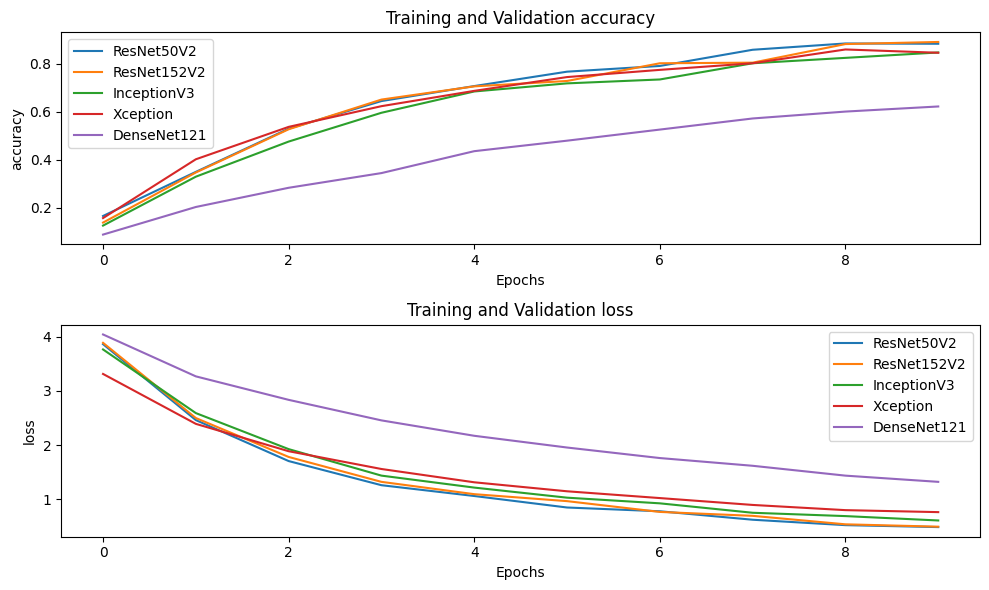

In [16]:
import matplotlib.pyplot as plt

# Define the metrics to plot (e.g., 'accuracy' and 'loss')
metrics_to_plot = ['accuracy', 'loss']

# Create subplots for each metric
fig, axes = plt.subplots(len(metrics_to_plot), 1, figsize=(10, 6))

for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 1, i+1)  # Create subplots for each metric
    for idx, history in enumerate(HISTORIES):
        plt.plot(history[metric], label=TL_Models_NAMES[idx])
    plt.title(f'Training and Validation {metric}')
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()

plt.tight_layout()
plt.show()

## Note ❗
<div class="table-of-contents" style="background-color:#87CEFA; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">
All training models are <b>similar in performance</b>, but there is a <b>red line that is better than the rest</b>, and it points to <i><b>Xception</b></i>. 
So we will select <i><b>Xception</b></i> for traning the model
    </div>

<a id="section-1"></a>
<h1 style="background-color: #87CEFA; color: #000; text-align: center; border: 2px solid #000; border-radius: 10px; padding: 10px; box-shadow: 5px 5px 5px rgba(0, 0, 0, 0.75); transform: rotateX(10deg);">
  Transfer Learning
</h1>

# 6️⃣ Transfer Learning

### 6.1 Get the weights from Xception

In [17]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(images_size, images_size, 3))

### 6.2 Freeze the layers of Xception

In [18]:
# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

<a id="section-1"></a>
<h1 style="background-color: #87CEFA; color: #000; text-align: center; border: 2px solid #000; border-radius: 10px; padding: 10px; box-shadow: 5px 5px 5px rgba(0, 0, 0, 0.75); transform: rotateX(10deg);">
  Build the model
</h1>

# 7️⃣.Build the model

In [19]:
model = tf.keras.models.Sequential([
    base_model,
    
    layers.GlobalAveragePooling2D(),
    
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes,activation='softmax'),
])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 7, 7, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,395,790 (81.62 MB)

 Trainable params: 534,310 (2.04 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

### 7.1 Set the optimizer

In [20]:
#optimizer = optimizers.Adam(learning_rate=learning_rate_schedule)
optimizer = keras.optimizers.Adam(learning_rate=learning_rate_schedule)
##HHHHHH
# lr_callback = LearningRateScheduler(learning_rate_schedule)
# callback=[ lr_callback , learning_rate_reduce ,early_stopping ]
callback=[ learning_rate_reduce ,early_stopping ]

In [21]:
model.compile(optimizer=optimizer,
             loss="categorical_crossentropy",
              metrics=['accuracy']
             )

### 7.2 Training the model

In [22]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[callback]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 776s 708ms/step - accuracy: 0.5904 - loss: 1.5079 - val_accuracy: 0.8496 - val_loss: 0.5014 - learning_rate: 8.9188e-04
Epoch 2/20
   1/1086 ━━━━━━━━━━━━━━━━━━━━ 3:23 188ms/step - accuracy: 0.8250 - loss: 0.7136

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1086/1086 ━━━━━━━━━━━━━━━━━━━━ 28s 25ms/step - accuracy: 0.8250 - loss: 0.7136 - val_accuracy: 0.8498 - val_loss: 0.4999 - learning_rate: 8.9179e-04
Epoch 3/20
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 585s 538ms/step - accuracy: 0.7959 - loss: 0.6532 - val_accuracy: 0.8696 - val_loss: 0.4247 - learning_rate: 7.9537e-04
Epoch 4/20
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 28s 25ms/step - accuracy: 0.8500 - loss: 0.6007 - val_accuracy: 0.8704 - val_loss: 0.4252 - learning_rate: 7.9529e-04
Epoch 5/20
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 574s 529ms/step - accuracy: 0.8269 - loss: 0.5463 - val_accuracy: 0.8844 - val_loss: 0.3650 - learning_rate: 7.0930e-04
Epoch 6/20
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 28s 25ms/step - accuracy: 0.8750 - loss: 0.5648 - val_accuracy: 0.8833 - val_loss: 0.3649 - learning_rate: 7.0923e-04
Epoch 7/20
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 580s 534ms/step - accuracy: 0.8399 - loss: 0.4950 - val_accuracy: 0.8874 - val_loss: 0.3430 - learning_rate: 6.3255e-04
Epoch 8/20
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 28s

<a id="section-1"></a>
<h1 style="background-color: #87CEFA; color: #000; text-align: center; border: 2px solid #000; border-radius: 10px; padding: 10px; box-shadow: 5px 5px 5px rgba(0, 0, 0, 0.75); transform: rotateX(10deg);">
  Evaluate the model
</h1>

# 8️⃣. Evaluate the model

### 8.1 Evaluate the validation

In [23]:
# Evaluate on test dataset
score = model.evaluate(test_generator, verbose=False)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.26389259099960327
Test accuracy: 0.9083041548728943


### 8.2 Accuracy graph 

<Figure size 640x480 with 0 Axes>

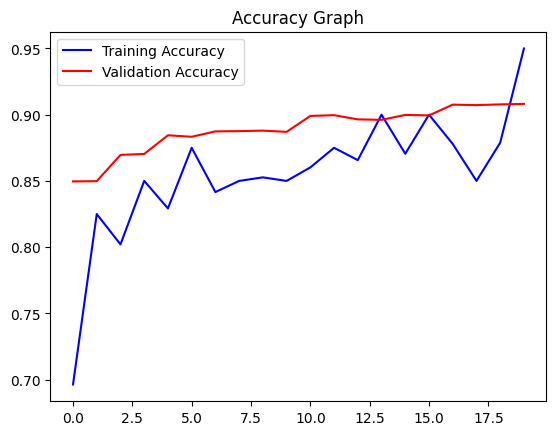

<Figure size 640x480 with 0 Axes>

In [24]:
# Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

### 8.3 Loss graph 

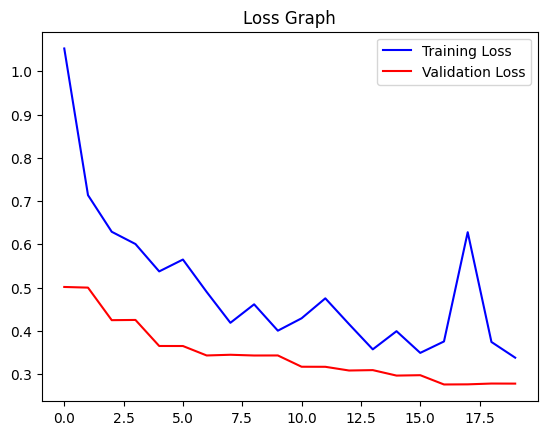

In [25]:
# Loss
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

### 8.4 Confusion Matrix

136/136 ━━━━━━━━━━━━━━━━━━━━ 28s 208ms/step


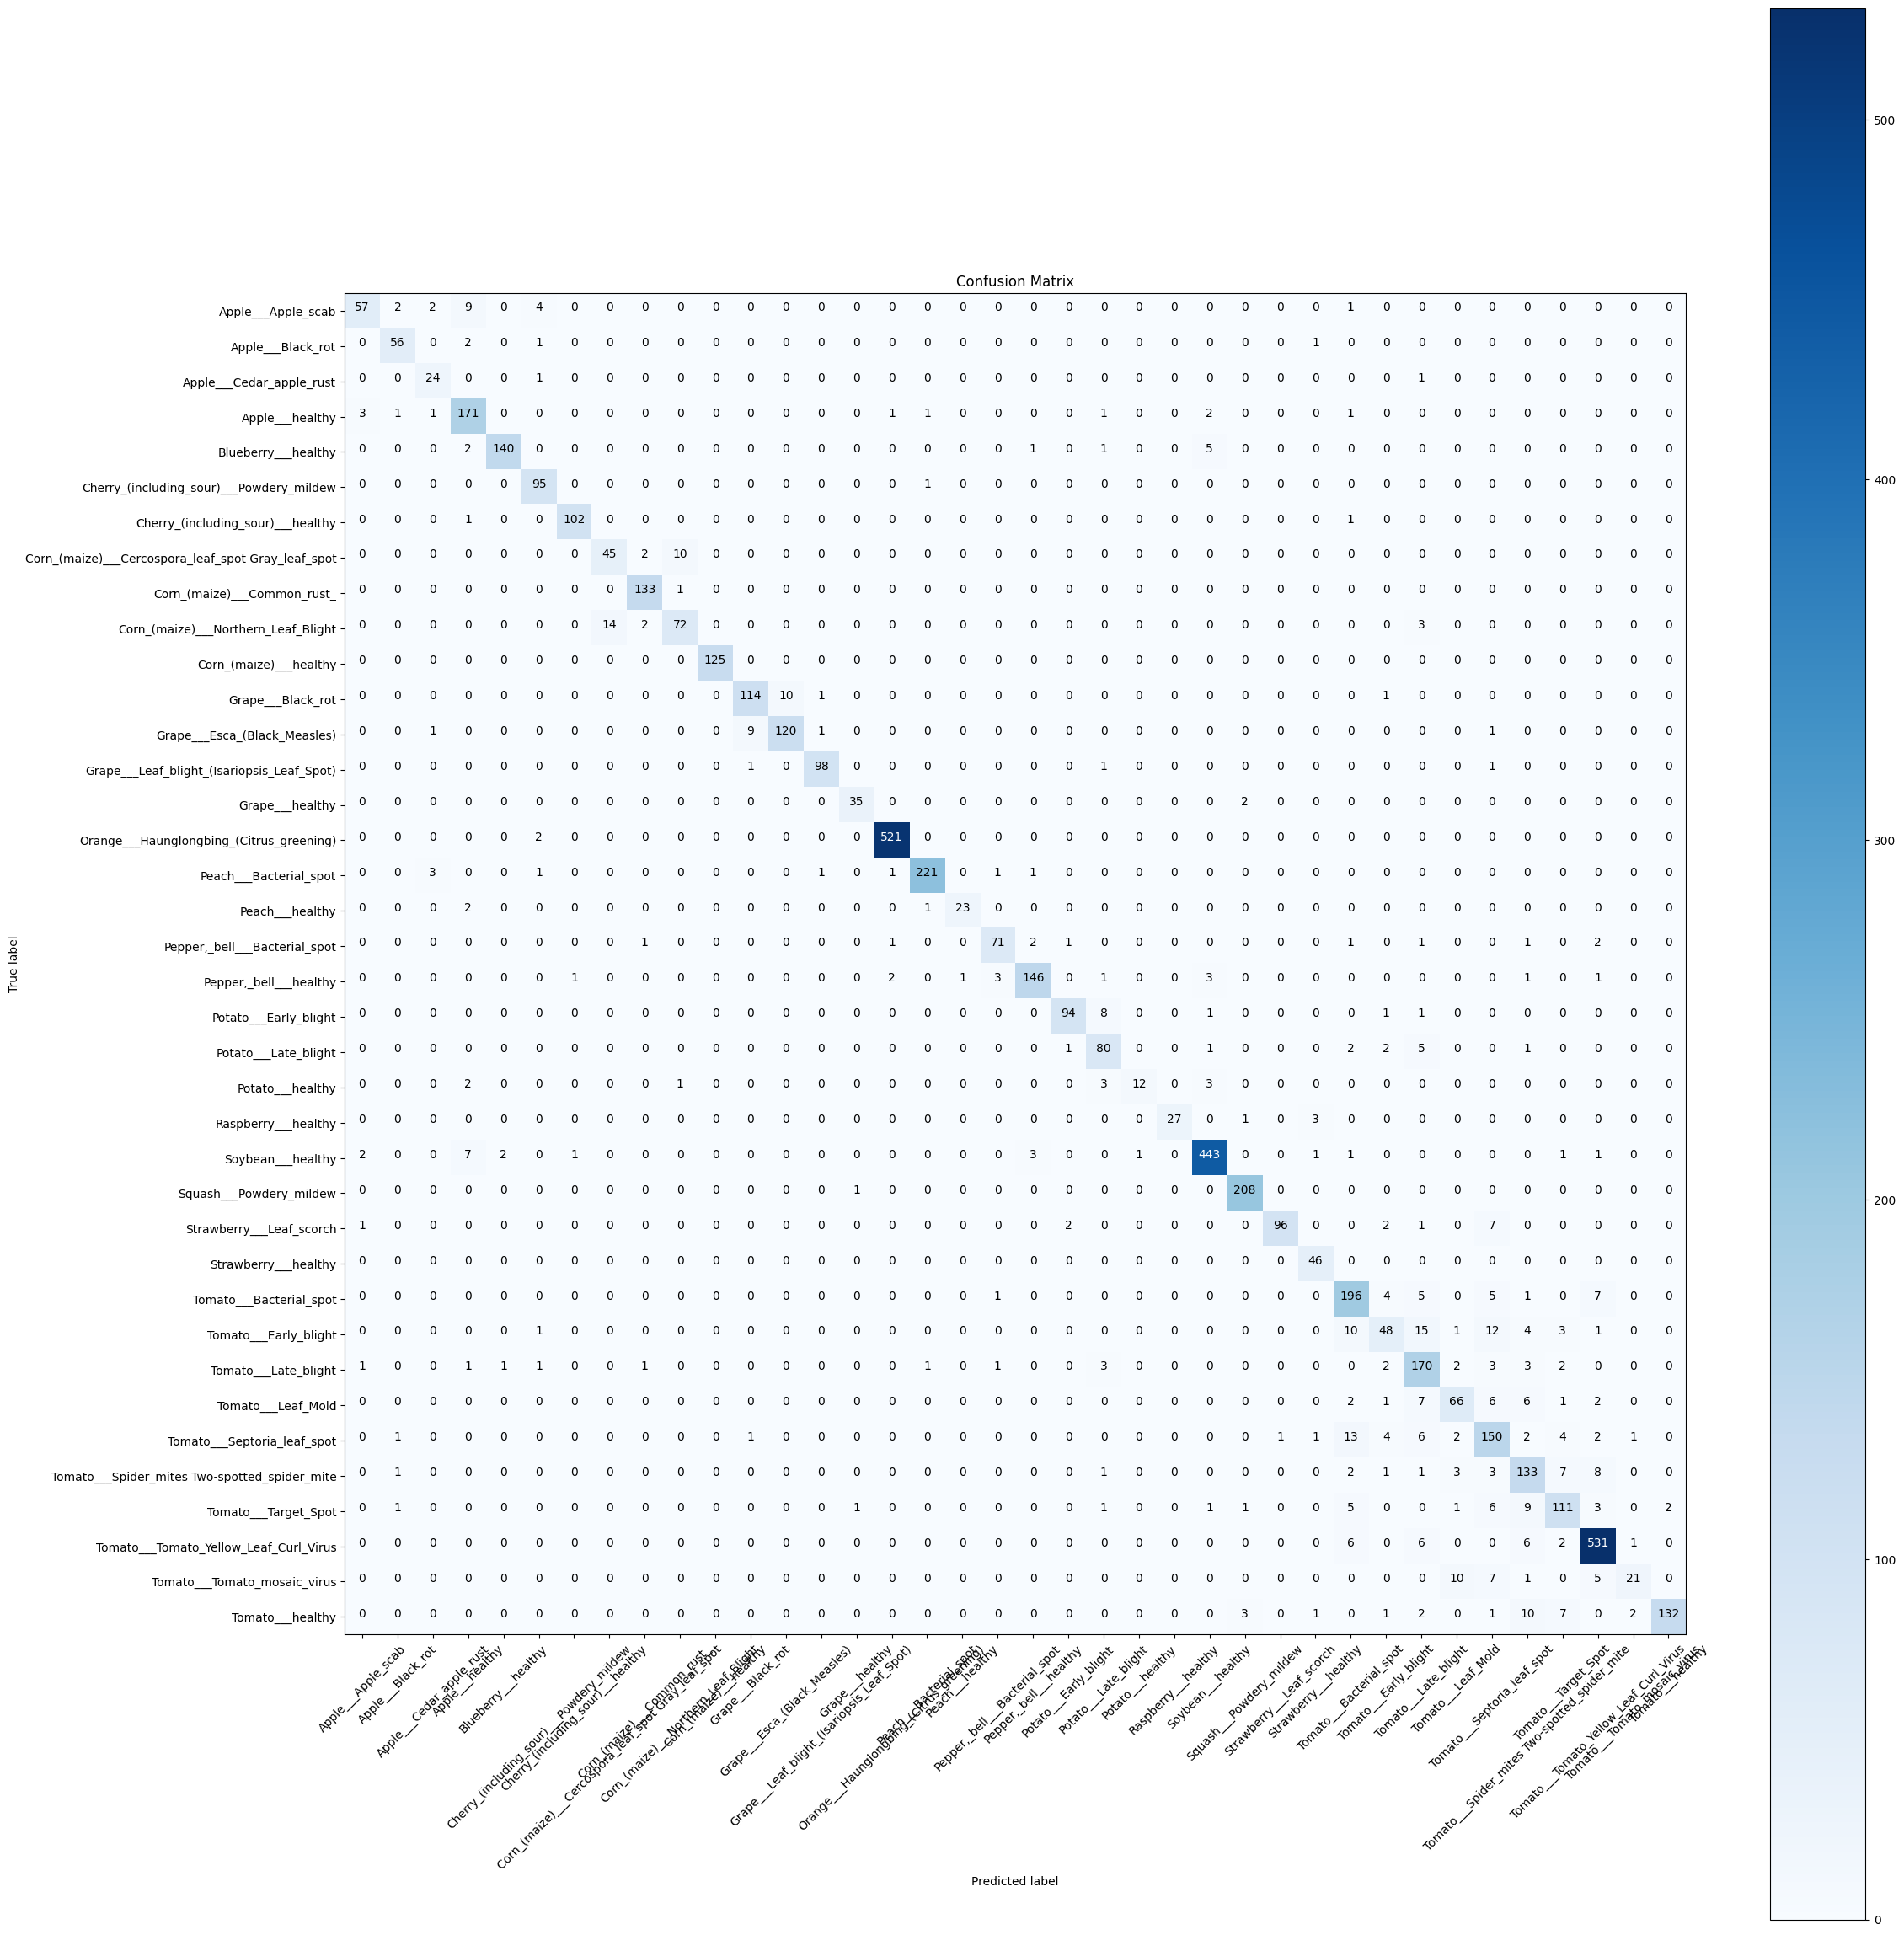

In [29]:
# Confusion Matrix
import itertools

# Make predictions on the test data
predictions = model.predict(test_generator)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels from the test_generator
true_labels = test_generator.classes

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class names (assuming you have class_names defined)
class_names = test_generator.class_indices.keys()

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Plot non-normalized confusion matrix
plt.figure(figsize=(24, 24))
plot_confusion_matrix(cm, classes=class_names, title="Confusion Matrix")
plt.show()

### 8.5 Generate predictions for the test data

2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step 


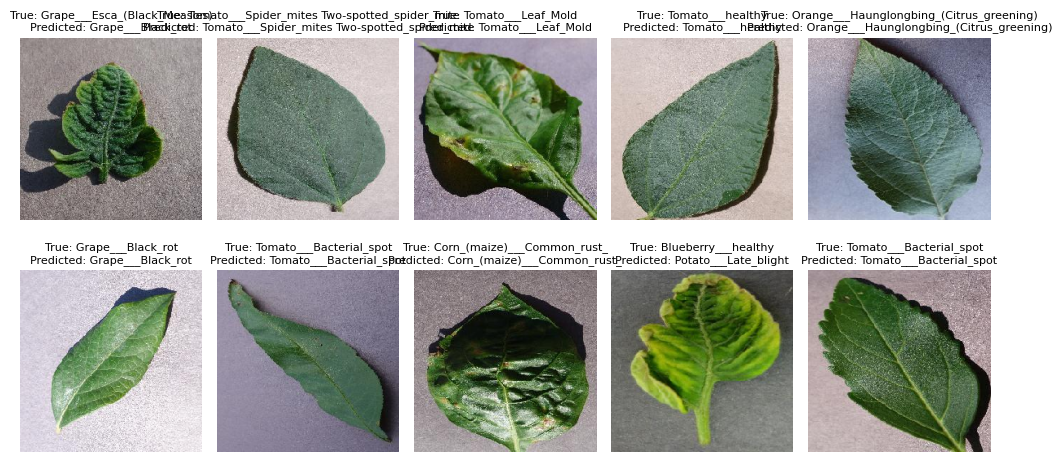

In [27]:
# Collect true labels and model predictions
true_labels = []
predicted_labels = []
class_names = test_generator.class_indices.keys()    
class_names = list(class_names)
num_batches = len(test_generator)
for i in range(10):
    x_batch, y_batch = test_generator[i]
    predictions = model.predict(x_batch)
    true_labels.extend(np.argmax(y_batch, axis=1))  # Convert one-hot encoded labels to class indices
    predicted_labels.extend(np.argmax(predictions, axis=1))


true_class_labels = [class_names[i] for i in true_labels]
predicted_class_labels = [class_names[i] for i in predicted_labels]

# Plot true labels and predicted labels
plt.figure(figsize=(10, 5))
num_samples_to_display = min(10, len(x_batch))  # Display up to 10 samples or less if available
for i in range(num_samples_to_display):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_batch[i])
    plt.title(f'True: {true_class_labels[i]}\nPredicted: {predicted_class_labels[i]}', fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [30]:
# Save the model
model.save('plant_village_model.keras')
print("Model saved as plant_village_model.keras")

Model saved as plant_village_model.keras
